<h1 style="color: #001a79;">Outliers</h1>

In [7]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Data analysis and manipulation tool
import pandas as pd

# Fancy plotting. 
import seaborn as sns

<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />

Create box plots on a single set of axes for all five experiments in the morley data set.

In [12]:
# Read in the morley data.
data = np.genfromtxt('data/morley.csv', skip_header=1, delimiter=',', deletechars='"')

# Remove the first column.
data = data[:,1:]

# A quick way to get the five experiments in different columns.
experiments = data[:,2].reshape(5, 20).T

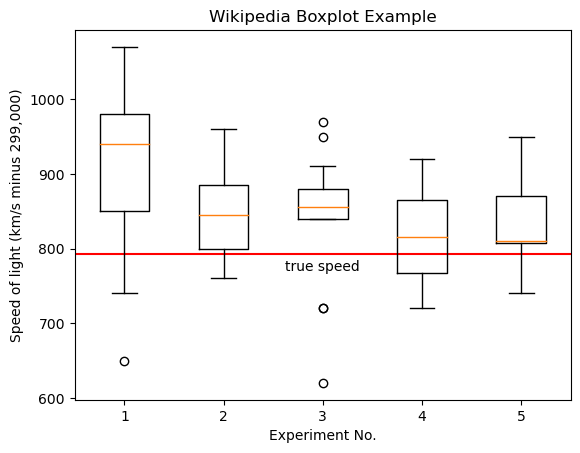

In [13]:
# Create a box plot.

# Add red line and text
plt.axhline(y=792.458, color='r')
plt.text(3,770,"true speed", horizontalalignment='center')

# Add labels and title
plt.xlabel("Experiment No.")
plt.ylabel("Speed of light (km/s minus 299,000)")
plt.title("Wikipedia Boxplot Example")

plt.boxplot(experiments);

Source: <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html" target="_blank">How to plot red line</a>


<h3 style="color: #001a79;">Exercise 1 - Cont</h3>

<hr style="border-top: 1px solid #001a79;" />

Try in pandas. 

In [14]:
# Import data to df. usecols gets rid of index row in data. 
df = pd.read_csv('data/morley.csv', usecols=["Expt", "Run", "Speed"])

In [15]:
df.head()

,Expt,Run,Speed
0,1,1,850
1,1,2,740
2,1,3,900
3,1,4,1070
4,1,5,930


Text(3, 770, 'true speed')

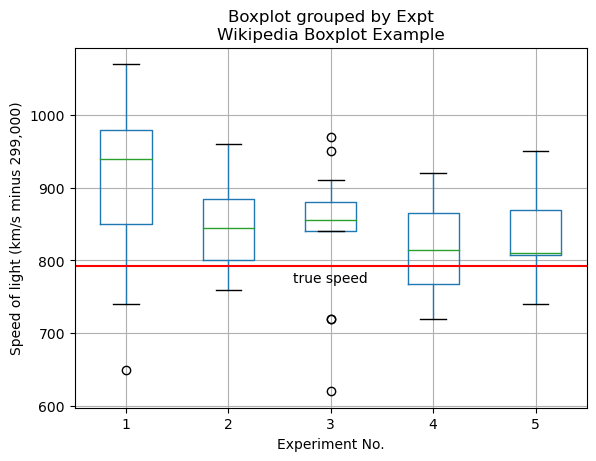

In [16]:
# Pandas boxplot
boxplot = df.boxplot(column=['Speed'], by="Expt")

# Add labels and title 
plt.title("Wikipedia Boxplot Example")
plt.xlabel("Experiment No.")
plt.ylabel("Speed of light (km/s minus 299,000)")

# Add red line and text
plt.axhline(y=792.458, color='r')
plt.text(3,770,"true speed", horizontalalignment='center')

<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html" target="_blank">Pandas: Read in CSV</a><br>
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html" target="_blank">Pandas: Boxplot</a>


<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

Create box plots for all of the numercial variables in Fisher's Iris Data Set.

In [10]:
# Set collumn names 
collumn_names = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm", "Species"] 

# Import Iris data to df from UCI Machine Learning Repository and add collumn names
iris_df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=collumn_names)

In [11]:
iris_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


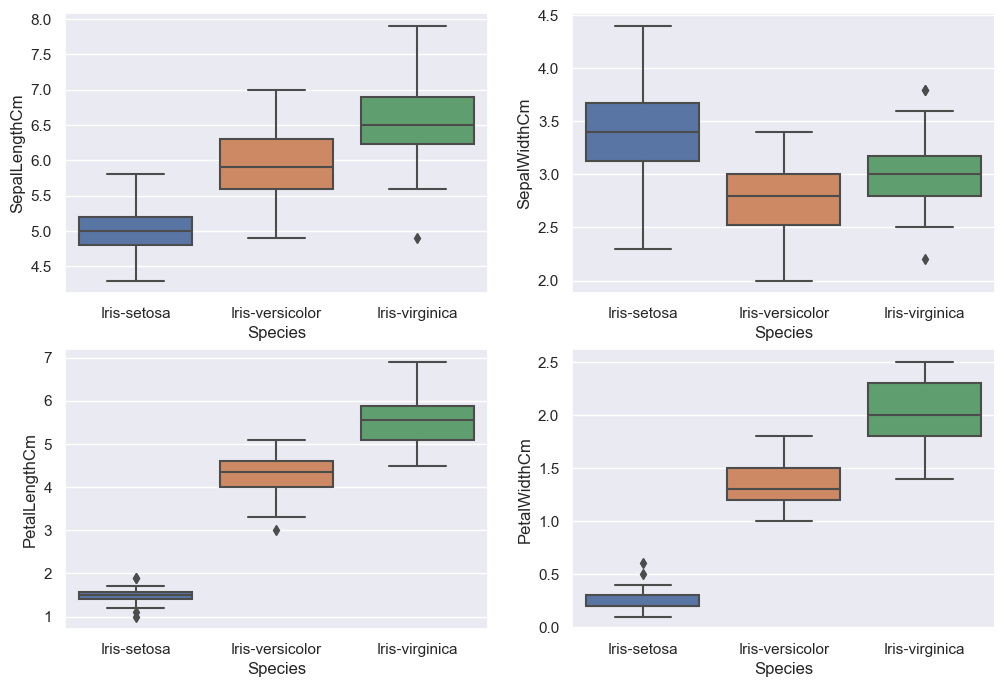

In [27]:
# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (12, 8)

# Sets the style of chart in Seaborn 
sns.set(style="darkgrid") 

# Create 2 x 2 plot. Each plots Iris datasets numeric variables by species.  
fig, axes = plt.subplots(2,2)
ax = sns.boxplot(data = iris_df, x = "Species", y = "SepalLengthCm", ax=axes[0, 0])
ax = sns.boxplot(data = iris_df, x = "Species", y = "SepalWidthCm", ax=axes[0, 1])
ax = sns.boxplot(data = iris_df, x = "Species", y = "PetalLengthCm", ax=axes[1, 0])
ax = sns.boxplot(data = iris_df, x = "Species", y = "PetalWidthCm", ax=axes[1, 1]);

Sources:<br>
<a href="https://stackoverflow.com/a/52473553" target="_blank">How to get 4 plots in one</a><br>
<a href="https://archive.ics.uci.edu/ml/datasets/iris" target="_blank">UCI Machine Learning Repository - Iris Dataset</a>

<h3 style="color: #001a79;">Exercise 3</h3>

<hr style="border-top: 1px solid #001a79;" />

Adapt the above code and plots so that the overall plot is inversely propertional and the individual groups are directly proportional.

In [38]:
# Create a series of x vectors.
xs = np.array([np.linspace(i, i + 2.0, 20) for i in range(10)])

In [63]:
# Create a corresponding series of y vectors.
ys = np.array([1.0 * xs[i] - 2 * i for i in range(len(xs))])

In [64]:
# Add some noise.
ys = ys + np.random.normal(0.0, 1.0, ys.shape)

In [65]:
# Create global list of x and y values.
x = xs.flatten()
y = ys.flatten()

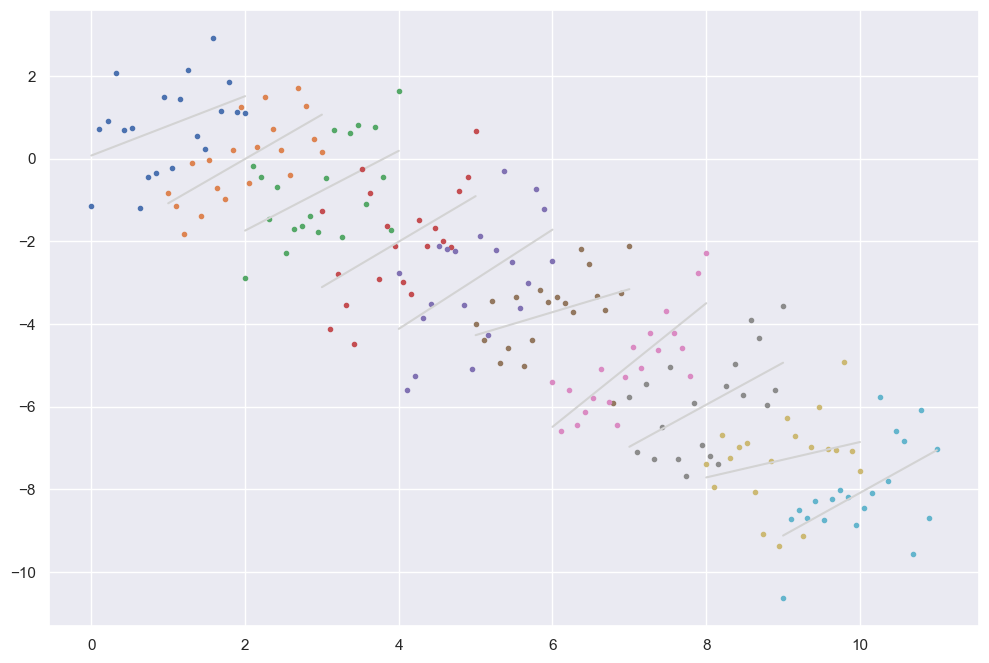

In [67]:
# Same plot but with best fit lines for each category.
for i in range(len(xs)):
    # Plot this category.
    plt.plot(xs[i], ys[i], '.')
    # Fit line to category.
    m, c = np.polyfit(xs[i], ys[i], 1)
    # Create steadily increasing x range for plot.
    xbestfit = np.linspace(xs[i].min(), xs[i].max(), 50)
    # Corresponding y values based on best fit line.
    ybestfit = m * xbestfit + c
    # Plot best fit line for category.
    plt.plot(xbestfit, ybestfit, color='lightgrey');

https://github.com/ianmcloughlin/2223-S1-fund-data-analysis/blob/main/notebooks/04-outliers.ipynb